In [ ]:
!python main.py -d person -p 'smokes(person);friends(person,person)' \
    -f 'friends(x,y);smokes(x);friends(x,y) ^ smokes(x) => smokes(y)' -s 10

Reading model using MLN syntax.
[I 201204 13:05:43 partition_func_solver:46] elapsed time for WFOMC call: 0.28197200782597065
Reading model using MLN syntax.
[I 201204 13:05:43 partition_func_solver:46] elapsed time for WFOMC call: 0.010504099540412426
Reading model using MLN syntax.
[I 201204 13:05:43 partition_func_solver:46] elapsed time for WFOMC call: 0.049124591052532196
Reading model using MLN syntax.
[I 201204 13:05:43 partition_func_solver:46] elapsed time for WFOMC call: 0.03861847147345543
Reading model using MLN syntax.
[I 201204 13:05:43 partition_func_solver:46] elapsed time for WFOMC call: 0.03434035275131464
Reading model using MLN syntax.
[I 201204 13:05:43 partition_func_solver:46] elapsed time for WFOMC call: 0.029426347464323044
Reading model using MLN syntax.
[I 201204 13:05:44 partition_func_solver:46] elapsed time for WFOMC call: 0.026834791526198387
[I 201204 13:05:45 polytope:240] elapsed time for quick-hull: 0.02483602799475193
[I 201204 13:05:45 solver:86] el

In [45]:
import re
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt


def parse_WFOMC_num(log_str):
    res = re.findall(r'num of call WFOMC: (\d+)', log_str)
    return int(res[0])

def parse_wfomc_time(log_str):
    res = re.findall(r'elapsed time for WFOMC call: ([\d\.]*)', log_str)
    return list(map(lambda x: float(x), res))

def parse_quick_hull_time(log_str):
    res = re.findall(r'elapsed time for quick-hull: ([\d\.]*)', log_str)
    return list(map(lambda x: float(x), res))

def parse_add_facet_time(log_str):
    res = re.findall(r'function add_facet execution time: ([\d\.]*)', log_str)
    return list(map(lambda x: float(x), res))

def parse_total_time(log_str):
    res = re.findall(r'Total time for finding convex hull: ([\d\.]*)', log_str)
    return float(res[0])

def parse_time(log_file):
    with open(log_file, 'r') as f:
        log = f.read()
    total_time, wfomc_time, quick_hull_time, add_facet_time = \
        parse_total_time(log), parse_wfomc_time(log), parse_quick_hull_time(log), parse_add_facet_time(log)
    WFOMC_num = parse_WFOMC_num(log)
    return total_time, WFOMC_num, wfomc_time, quick_hull_time, add_facet_time
    

def plot(log_dir, prefix='2d', max_domain_size = 50):
    WFOMC_nums = []
    total_wfomc_time = []
    average_wfomc_time = []
    total_quick_hull_time = []
    average_quick_hull_time = []
    total_add_facet_time = []
    average_add_facet_time = []
    for i in range(1, max_domain_size + 1):
        _, WFOMC_num, wfomc_time, quick_hull_time, add_facet_time = parse_time('{}/{}/log.txt'.format(log_dir, i))
        total_wfomc_time.append(np.sum(wfomc_time))
        average_wfomc_time.append(np.mean(wfomc_time))
        total_quick_hull_time.append(np.sum(quick_hull_time))
        average_quick_hull_time.append(np.mean(quick_hull_time))
        total_add_facet_time.append(np.sum(add_facet_time))
        average_add_facet_time.append(np.mean(add_facet_time))
        WFOMC_nums.append(WFOMC_num)


    plt.title('Total WFOMC calls ({})'.format(prefix))
    WFOMC_nums = np.array(WFOMC_nums)
#     WFOMC_nums = np.log(WFOMC_nums)
    plt.plot(WFOMC_nums)
    plt.xlabel('domain size')
    plt.ylabel('call number')
    plt.show()


    plt.title('Total runtime for each part ({})'.format(prefix))
    colors = sns.color_palette('hls', 3)
    plt.plot(total_wfomc_time, label='wfomc', color=colors[0])
    plt.plot(total_quick_hull_time, label='quick hull', color=colors[1])
    # plt.plot(total_add_facet_time, label='convex hull processing', color=colors[2])
    plt.legend()
    plt.xlabel('domain size')
    plt.ylabel('second')
    plt.show()


    plt.title('Average runtime for each part ({})'.format(prefix))
    colors = sns.color_palette('hls', 3)
    plt.plot(average_wfomc_time, label='wfomc', color=colors[0])
    plt.plot(average_quick_hull_time, label='quick hull', color=colors[1])
    # plt.plot(average_add_facet_time, label='convex hull processing', color=colors[2])
    plt.legend()
    plt.xlabel('domain size')
    plt.ylabel('second')
    plt.show()

/home/lucien/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/lucien/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


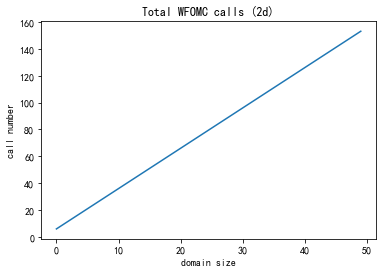

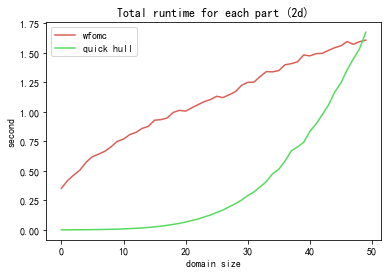

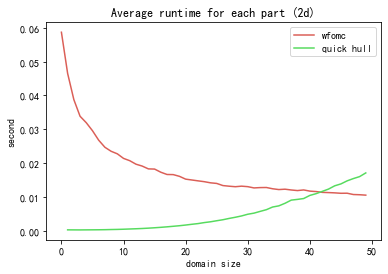

/home/lucien/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/lucien/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


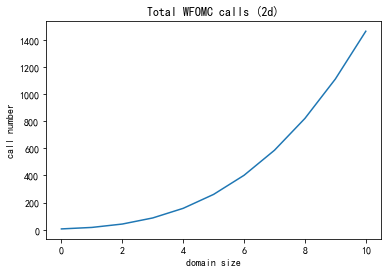

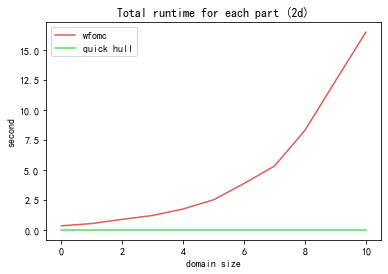

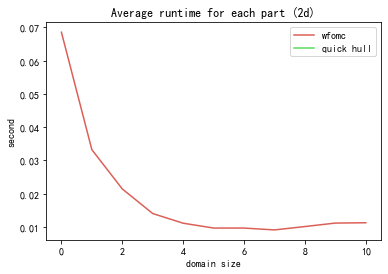

In [29]:
plot('./logs/2d/iter/', '2d')
plot('./logs/2d/dft/', '2d', 11)

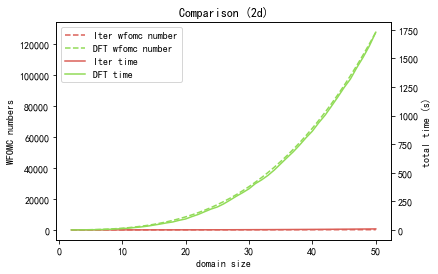

In [70]:
def plot_comparison(iter_dir, dft_dir, prefix='2d', max_domain_size=50):
    iter_wfomc_num = []
    dft_wfomc_num = []
    iter_time = []
    dft_time = []
    for i in range(2, max_domain_size + 1):
        iter_log = '{}/{}/log.txt'.format(iter_dir, i)
        dft_log = '{}/{}/log.txt'.format(dft_dir, i)
        total_time, wfomc_num, _, _, _ = parse_time(iter_log)
        iter_wfomc_num.append(wfomc_num)
        iter_time.append(total_time)
        total_time, wfomc_num, _, _, _ = parse_time(dft_log)
        dft_wfomc_num.append(wfomc_num)
        dft_time.append(total_time)
    
    domain_size = list(range(2, max_domain_size + 1))
    
    colors = sns.color_palette('hls', 4)
    
    fig, ax1 = plt.subplots()
    ax1.plot(domain_size, iter_wfomc_num, color=colors[0], linestyle='--', label='Iter wfomc number')
    ax1.plot(domain_size, dft_wfomc_num, color=colors[1], linestyle='--', label='DFT wfomc number')

    ax2 = ax1.twinx()
    ax2.plot(domain_size, iter_time, color=colors[0], label='Iter time')
    ax2.plot(domain_size, dft_time, color=colors[1], label='DFT time')

    ax1.set_xlabel('domain size')
    ax1.set_ylabel('WFOMC numbers')
    ax2.set_ylabel('total time (s)')
    
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    plt.legend(lines + lines2, labels + labels2, loc=0)
    
    plt.title('Comparison ({})'.format(prefix))
    plt.show()
    
    
plot_comparison('./logs/2d/iter/', './logs/2d/dft/', max_domain_size=50)

In [72]:
import pickle

def read_vertices(file_name):
    with open(file_name, 'rb') as f:
        convex_hull = pickle.load(f)
    return set([str(convex_hull.points[v]) for v in convex_hull.vertices])
    

def check(iter_dir, dft_dir, max_domain_size=50):
    for i in range(2, max_domain_size + 1):
        iter_vertices = read_vertices('{}/{}/convex_hull.pkl'.format(iter_dir, i))
        dft_vertices = read_vertices('{}/{}/convex_hull.pkl'.format(dft_dir, i))
        if iter_vertices != dft_vertices:
            print("mismatched convex hull when domain size is {}".format(i))
            print("iter vertices: {}".format(sorted(iter_vertices)))
            print("dft vertices: {}".format(sorted(dft_vertices)))
    print('all matched!')
    

check('./logs/2d/iter/', 'logs/2d/dft/', 50)

mismatched convex hull when domain size is 12
iter vertices: {'[144.  12.]', '[112.   8.]', '[109.   5.]', '[124.   2.]', '[117.   3.]', '[144.   0.]', '[133.  11.]', '[109.   7.]', '[112.   4.]', '[108.   6.]', '[133.   1.]', '[117.   9.]', '[124.  10.]'}
dft vertices: {'[144.  12.]', '[110.   5.]', '[124.   2.]', '[117.   3.]', '[144.   0.]', '[133.  11.]', '[110.   7.]', '[113.   4.]', '[133.   1.]', '[117.   9.]', '[124.  10.]', '[109.   6.]', '[113.   8.]'}
mismatched convex hull when domain size is 13
iter vertices: {'[139.  10.]', '[139.   3.]', '[157.  12.]', '[127.   6.]', '[129.   8.]', '[169.   0.]', '[127.   7.]', '[147.   2.]', '[157.   1.]', '[133.   9.]', '[147.  11.]', '[129.   5.]', '[169.  13.]', '[133.   4.]'}
dft vertices: {'[157.   1.]', '[157.  12.]', '[147.   2.]', '[169.   0.]', '[140.  10.]', '[131.   8.]', '[147.  11.]', '[135.   4.]', '[130.   6.]', '[130.   7.]', '[169.  13.]', '[135.   9.]', '[140.   3.]', '[131.   5.]'}
mismatched convex hull when domain s

In [34]:
dist = np.load('./dist.npy')
print(dist[37, 0, :])

FileNotFoundError: [Errno 2] No such file or directory: './dist.npy'

# ![](./polytope.png)